# Fake News Detection

Importing Libraries

In [1]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize


Load and Preprocess the Dataset

In [2]:
fake = pd.read_csv("/content/drive/MyDrive/news-dataset/Fake.csv")
real = pd.read_csv("/content/drive/MyDrive/news-dataset/True.csv")


fake['label'] = 0
real['label'] = 1

df = pd.concat([fake, real], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df['content'] = df['title'] + " " + df['text']
print(df.head())

                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  \
0    February 13, 2017      0   
1       April 5, 2017       1   
2  September 27, 2017       1   
3         May 22, 2017      0   
4       June 24, 2016       1   

                                           

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
 5   content  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


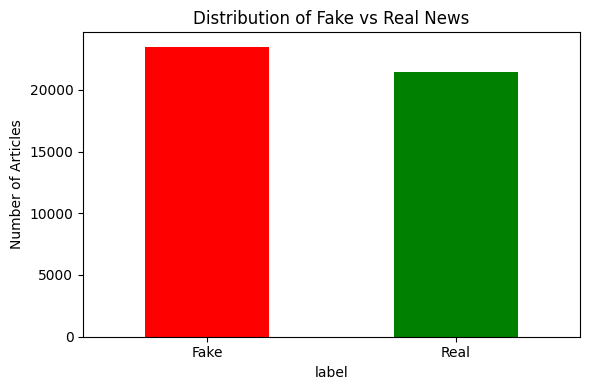

In [4]:
# Count the number of each label
counts = df['label'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
counts.plot(kind='bar',color=['red', 'green'])
plt.xticks([0, 1], ['Fake', 'Real'], rotation=0)
plt.ylabel('Number of Articles')
plt.title('Distribution of Fake vs Real News')
plt.tight_layout()
plt.show()


In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", " ", text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_content'] = df['content'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Train/Test Split

In [6]:
X_train_text, X_test_text, y_train, y_test = train_test_split(df['clean_content'], df['label'], test_size=0.2, random_state=42)


In [7]:
vectorizer = TfidfVectorizer(max_features=50000, ngram_range=(1, 2), min_df=5, max_df=0.8)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

Logistic Regression

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))


Accuracy: 0.9893095768374165
F1 Score: 0.9887902849135918
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4710
        Real       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Support Vector Machine

In [11]:
model1 = LinearSVC()
model1.fit(X_train, y_train)

LinearSVC()

In [12]:
y_pred_svm = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

Accuracy: 0.9893095768374165
F1 Score: 0.9887902849135918
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4710
        Real       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [13]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# For Logistic Regression
y_pred = y_pred = model.predict(X_test)

# For SVM
y_pred_svm = model1.predict(X_test)

In [14]:
# Logistic Regression
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Logistic Regression):")
print(cm)

# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix (SVM):")
print(cm_svm)


Confusion Matrix (Logistic Regression):
[[4650   60]
 [  36 4234]]

Confusion Matrix (SVM):
[[4688   22]
 [  17 4253]]


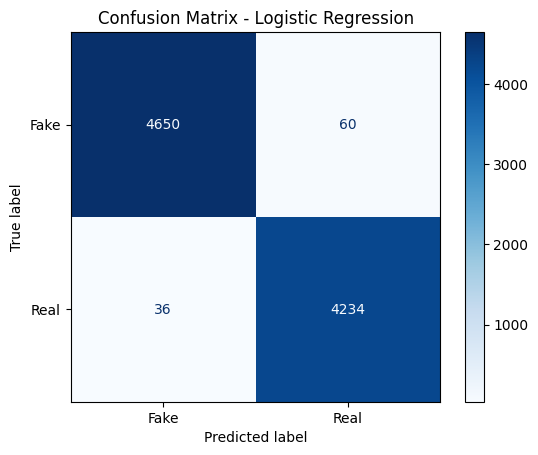

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Fake", "Real"], cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



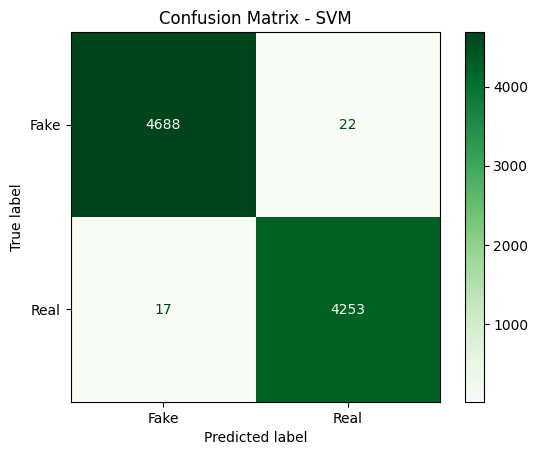

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=["Fake", "Real"], cmap="Greens")
plt.title("Confusion Matrix - SVM")
plt.show()

Model Testing for Logistic Regression

In [17]:
X1_new = X_test[0]
X1_new = X1_new.reshape(1, -1)

prediction = model.predict(X1_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is Real')

[0]
The news is Fake


In [18]:
true_label = y_test.iloc[0]
print("Actual Label:", true_label)

if true_label == 0:
    print("Actual: Fake")
else:
    print("Actual: Real")

Actual Label: 0
Actual: Fake


Most Frequent words in the Real and Fake Dataset

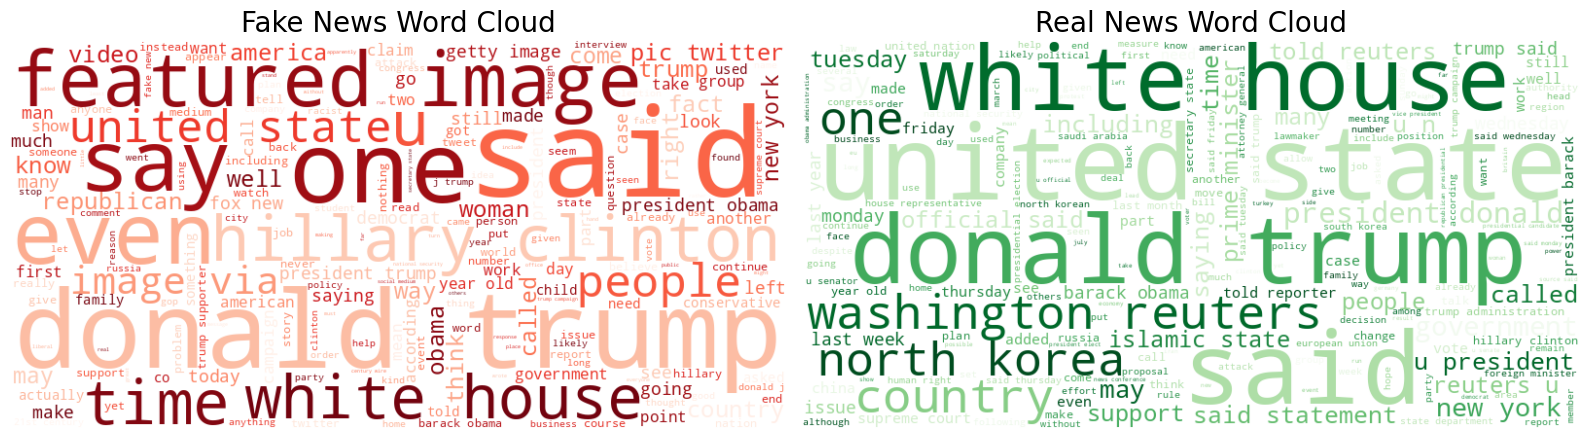

In [19]:
# Join all cleaned text for each class
fake_text = ' '.join(df[df['label'] == 0]['clean_content'])
real_text = ' '.join(df[df['label'] == 1]['clean_content'])

# Generate word clouds
fake_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(fake_text)
real_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(real_text)

# Display the word clouds side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud', fontsize=20)

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Real News Word Cloud', fontsize=20)

plt.tight_layout()
plt.show()
